In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(102317044)
data={"Electronics":[np.random.randint(1000,5000) for _ in range (12)],
      "Clothing":[np.random.randint(1000,5000) for _ in range (12)],
      "Home & Kitchen":[np.random.randint(1000,5000) for _ in range (12)],
      "Sports":[np.random.randint(1000,5000) for _ in range (12)]}
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df=pd.DataFrame(data,index=months)

In [3]:
df.head()

,Electronics,Clothing,Home & Kitchen,Sports
Jan,4459,4091,3572,3099
Feb,1325,2318,3055,3998
Mar,2318,4758,2644,2370
Apr,4968,3873,4248,4077
May,1866,3617,2053,4762


In [4]:
#summary
df.describe()

,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,2736.250000,3277.916667,3202.250000,3740.500000
std,1309.555589,1182.259890,1203.412884,969.087622
min,1000.000000,1453.000000,1140.000000,2221.000000
25%,1876.500000,2175.750000,2496.250000,2916.750000
50%,2274.500000,3617.000000,3491.500000,4078.000000
75%,3985.500000,4139.250000,4243.500000,4415.500000
max,4968.000000,4758.000000,4600.000000,4762.000000


In [5]:
#total sales per category
total_sales_per_category=df.sum(axis=0)
total_sales_per_category

Electronics       32835
Clothing          39335
Home & Kitchen    38427
Sports            44886
dtype: int64

In [6]:
#total sales per mpnth
total_sales_per_month=df.sum(axis=1)
total_sales_per_month

Jan    15221
Feb    10696
Mar    12090
Apr    17166
May    12298
Jun    15968
Jul     9213
Aug    11726
Sep    11749
Oct    14816
Nov    10593
Dec    13947
dtype: int64

In [7]:
monthly_growth = df.pct_change()
average_growth_per_category = monthly_growth.mean() * 100
average_growth_per_category

Electronics       22.629684
Clothing           4.674186
Home & Kitchen    38.874228
Sports            10.693347
dtype: float64

In [8]:
df['Total Sales']=total_sales_per_month

In [9]:
df['Growth']=df['Total Sales'].pct_change() * 100
df

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth
Jan,4459,4091,3572,3099,15221,NaN
Feb,1325,2318,3055,3998,10696,-29.728664
Mar,2318,4758,2644,2370,12090,13.032909
Apr,4968,3873,4248,4077,17166,41.985112
May,1866,3617,2053,4762,12298,-28.358383
Jun,2657,4284,4517,4510,15968,29.842251
Jul,1000,4640,1264,2309,9213,-42.303357
Aug,2031,3232,4242,2221,11726,27.276674
Sep,2231,1749,3411,4358,11749,0.196145
Oct,1880,3617,4600,4719,14816,26.104349


In [10]:
df['Discounted Electronics']=df['Electronics']*0.90
df

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth,Discounted Electronics
Jan,4459,4091,3572,3099,15221,NaN,4013.1
Feb,1325,2318,3055,3998,10696,-29.728664,1192.5
Mar,2318,4758,2644,2370,12090,13.032909,2086.2
Apr,4968,3873,4248,4077,17166,41.985112,4471.2
May,1866,3617,2053,4762,12298,-28.358383,1679.4
Jun,2657,4284,4517,4510,15968,29.842251,2391.3
Jul,1000,4640,1264,2309,9213,-42.303357,900.0
Aug,2031,3232,4242,2221,11726,27.276674,1827.9
Sep,2231,1749,3411,4358,11749,0.196145,2007.9
Oct,1880,3617,4600,4719,14816,26.104349,1692.0


In [11]:
sns.set(style="whitegrid")

In [12]:
columns=list(df.columns)

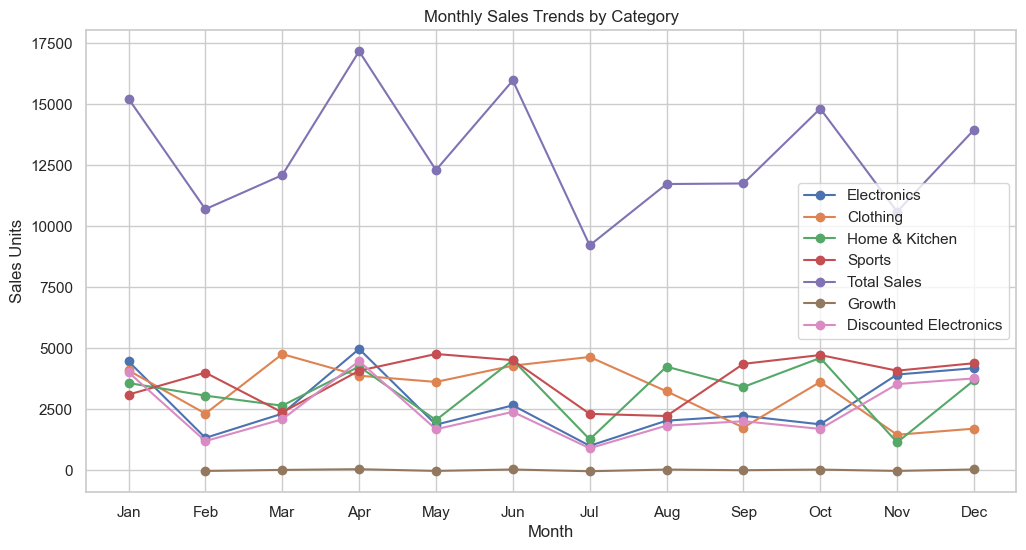

In [13]:
plt.figure(figsize=(12, 6))
for col in columns:
    plt.plot(df.index, df[col], marker='o', label=col)
plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()
plt.show()

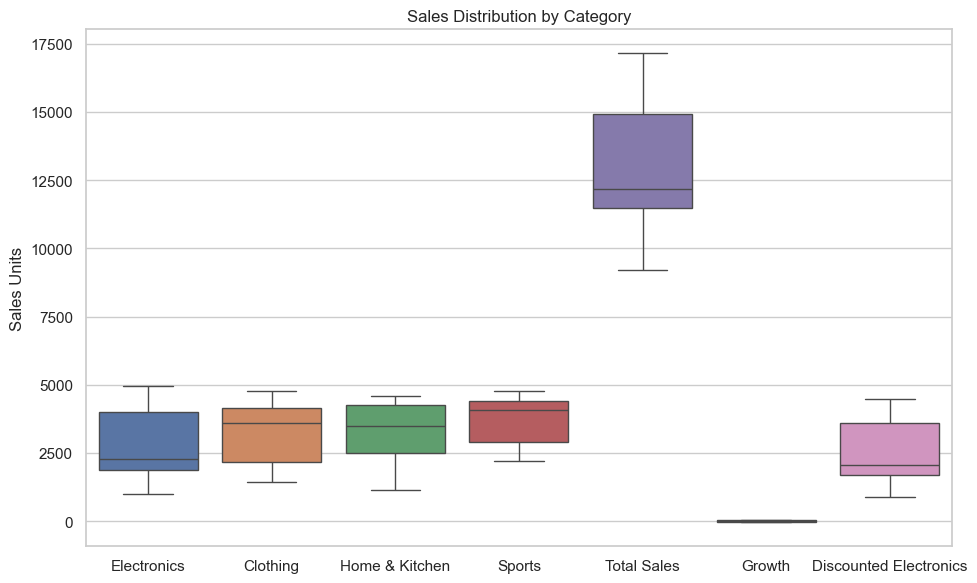

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns])
plt.title('Sales Distribution by Category')
plt.ylabel('Sales Units')
plt.tight_layout()
plt.show()

In [15]:
array=np.array([[1,-2,3],[-4,5,-6]])
array

array([[ 1, -2,  3],
       [-4,  5, -6]])

In [16]:
absolute=np.abs(array)
absolute

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
flattened=array.flatten()
flattened

array([ 1, -2,  3, -4,  5, -6])

In [18]:
# 1. For Flattened array
percentiles_flat = np.percentile(flattened, [25, 50, 75])
percentiles_flat

array([-3.5, -0.5,  2.5])

In [19]:
# 2. For each column (axis=0)
percentiles_columns = np.percentile(array, [25, 50, 75], axis=0)
percentiles_columns

array([[-2.75, -0.25, -3.75],
       [-1.5 ,  1.5 , -1.5 ],
       [-0.25,  3.25,  0.75]])

In [20]:
# 3. For each row (axis=1)
percentiles_rows = np.percentile(array, [25, 50, 75], axis=1)
percentiles_rows

array([[-0.5, -5. ],
       [ 1. , -4. ],
       [ 2. ,  0.5]])

In [21]:
# For the flattened array:
mean_flat = np.mean(flattened)
median_flat = np.median(flattened)
std_flat = np.std(flattened)
print("Mean:", mean_flat, "Median:", median_flat, "Standard Deviation:", std_flat)
print("\n")

Mean: -0.5 Median: -0.5 Standard Deviation: 3.8622100754188224




In [22]:
# For each column:
mean_cols = np.mean(array, axis=0)
median_cols = np.median(array, axis=0)
std_cols = np.std(array, axis=0)
print("Mean:", mean_cols, "Median:", median_cols, "Standard Deviation:", std_cols)
print("\n")

Mean: [-1.5  1.5 -1.5] Median: [-1.5  1.5 -1.5] Standard Deviation: [2.5 3.5 4.5]




In [23]:
# For each row:
mean_rows = np.mean(array, axis=1)
median_rows = np.median(array, axis=1)
std_rows = np.std(array, axis=1)
print("Mean:", mean_rows, "Median:", median_rows, "Standard Deviation:", std_rows)

Mean: [ 0.66666667 -1.66666667] Median: [ 1. -4.] Standard Deviation: [2.05480467 4.78423336]


In [24]:
a=np.array([-1.8,-1.6,-0.5,0.5,1.6,1.8,3.0])
a

array([-1.8, -1.6, -0.5,  0.5,  1.6,  1.8,  3. ])

In [25]:
np.floor(a)

array([-2., -2., -1.,  0.,  1.,  1.,  3.])

In [26]:
np.ceil(a)

array([-1., -1., -0.,  1.,  2.,  2.,  3.])

In [27]:
np.trunc(a)

array([-1., -1., -0.,  0.,  1.,  1.,  3.])

In [28]:
np.round(a)

array([-2., -2., -0.,  0.,  2.,  2.,  3.])

In [29]:
#Swapping 1st and 3rd index values
i=1
j=3
l1=[11,22,33,44,55,66]
l1

[11, 22, 33, 44, 55, 66]

In [30]:
temp=l1[i]
l1[i]=l1[j]
l1[j]=temp
l1

[11, 44, 33, 22, 55, 66]

In [31]:
s1={1,2,3,5}
s1

{1, 2, 3, 5}

In [32]:
l2=list(s1)
l2
temp=l2[i]
l2[i]=l2[j]
l2[j]=temp
l2

[1, 5, 3, 2]